# Processing Trading Data

In [1]:
import pandas as pd
#import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

In [2]:
response = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo')
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [3]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2021-04-01 to 2020-11-06
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [4]:
type(stock.index)

pandas.core.indexes.base.Index

In [5]:
stock.index = pd.to_datetime(stock.index)
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
stock.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [7]:
stock.columns = ['open', 'high', 'low', 'close', 'volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [8]:
print(type(stock['close'][1]))
# Convert all string values to fload in stock DataFrame
stock = stock.astype(float)
print(type(stock['close'][1]))

<class 'str'>
<class 'numpy.float64'>


## Sample Data

In [9]:
sample = stock.sample(10)
sample

,open,high,low,close,volume
2020-11-09,224.435,228.120,217.88,218.39,44394950.0
2020-12-10,211.770,213.080,210.36,210.52,26467017.0
2021-02-18,241.800,243.930,240.86,243.79,16925563.0
2020-11-16,214.870,217.740,214.52,217.23,24953344.0
2021-02-22,237.420,237.930,232.40,234.51,36182764.0
2020-11-20,212.200,213.285,210.00,210.39,22843119.0
2021-02-24,230.010,235.200,229.00,234.55,26339746.0
2020-12-02,214.880,215.470,212.80,215.37,23724509.0
2021-01-21,224.700,226.300,222.42,224.97,30749553.0
2021-03-04,226.735,232.490,224.26,226.73,44727785.0


In [10]:
stock.describe()

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,226.136047,228.446724,223.976925,226.251900,2.923160e+07
std,10.809478,10.892505,10.614236,10.816922,9.428849e+06
min,209.590000,212.290000,208.160000,210.110000,1.055057e+07
25%,215.052500,217.395000,213.695000,216.160000,2.325016e+07
50%,225.770000,227.650000,223.300000,224.965000,2.708810e+07
75%,235.682500,237.585000,232.392500,235.532500,3.319262e+07
max,245.030000,246.130000,242.920000,244.990000,6.987064e+07


<AxesSubplot:title={'center':'Microsoft (MSFT) daily closing prices'}>

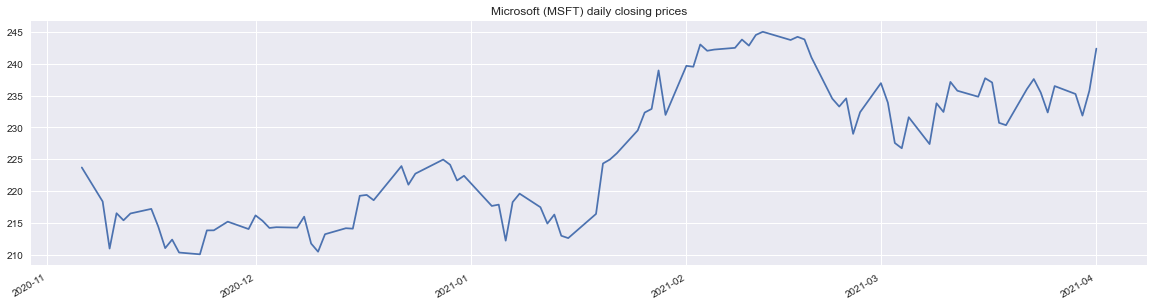

In [11]:
stock['close'].plot(figsize=(20, 5), title='Microsoft (MSFT) daily closing prices')

<AxesSubplot:title={'center':'The 10 and 20 day simple moving averages of Microsoft'}>

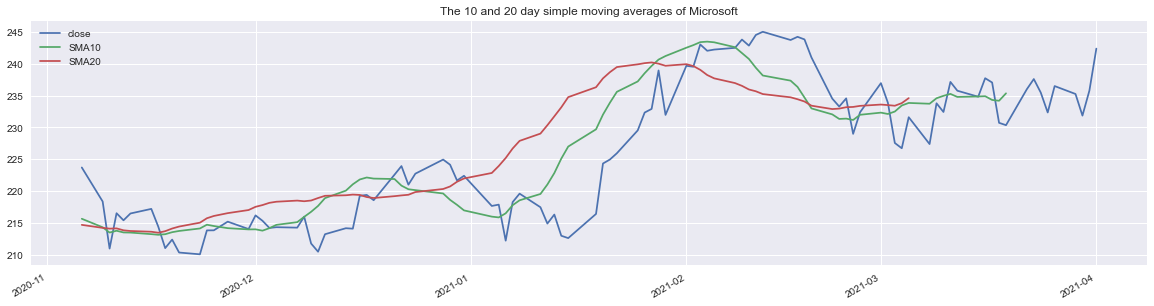

In [12]:
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20, 5), grid=True, title='The 10 and 20 day simple moving averages of Microsoft')

In [13]:
stock.head()

,open,high,low,close,volume,SMA10,SMA20
2021-04-01,238.470,242.84,238.0501,242.35,30337982.0,NaN,NaN
2021-03-31,232.910,239.10,232.3900,235.77,43623471.0,NaN,NaN
2021-03-30,233.525,233.85,231.1000,231.85,24792012.0,NaN,NaN
2021-03-29,236.590,236.80,231.8800,235.24,25227455.0,NaN,NaN
2021-03-26,231.550,236.71,231.5500,236.48,25479853.0,NaN,NaN


<AxesSubplot:title={'center':'The 10 and 20 day simple moving averages of Microsoft'}>

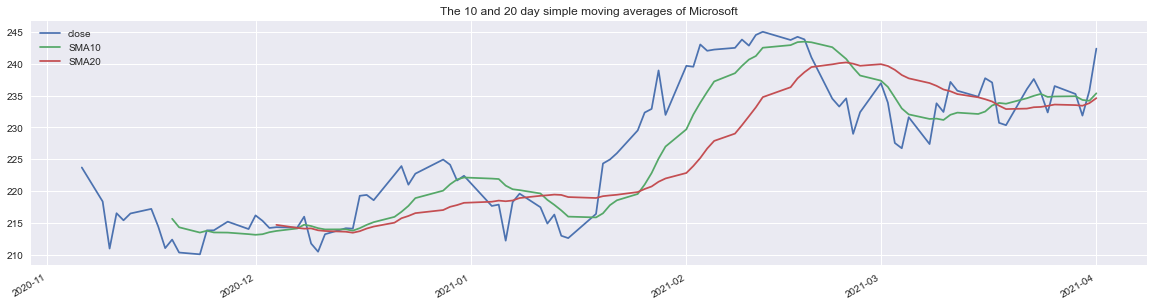

In [14]:
stock = stock.sort_index(ascending=True)
stock['SMA10'] = stock['close'].rolling(10).mean()
stock['SMA20'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20, 5), grid=True, title='The 10 and 20 day simple moving averages of Microsoft')

<AxesSubplot:title={'center':'The 10 and 20 day simple moving averages of Microsoft'}>

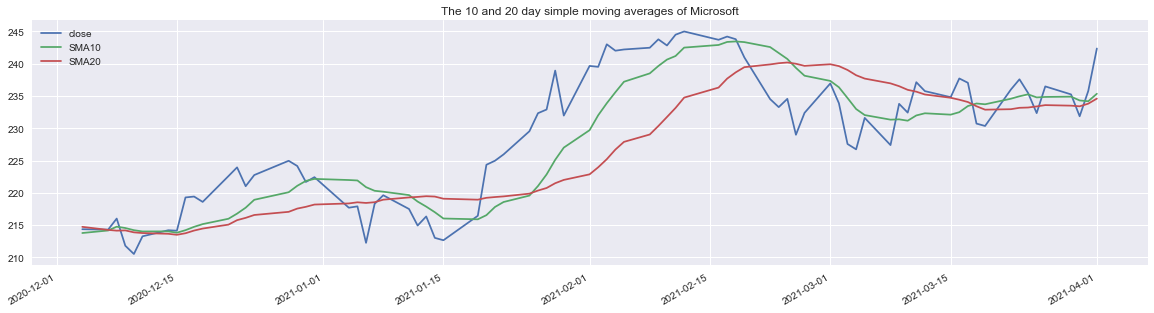

In [15]:
stock.dropna(inplace=True)
stock[['close', 'SMA10', 'SMA20']].plot(figsize=(20, 5), grid=True, title='The 10 and 20 day simple moving averages of Microsoft')

## Analyzing Data

In [16]:
signal = pd.DataFrame()
signal['crossover'] = stock['SMA10'] - stock['SMA20']
signal.tail()

,crossover
2021-03-26,1.2655
2021-03-29,1.3935
2021-03-30,0.9085
2021-03-31,0.3710
2021-04-01,0.7530


In [17]:
 stock = stock.join(signal, how='left')
 stock.tail()

,open,high,low,close,volume,SMA10,SMA20,crossover
2021-03-26,231.550,236.71,231.5500,236.48,25479853.0,234.848,233.5825,1.2655
2021-03-29,236.590,236.80,231.8800,235.24,25227455.0,234.891,233.4975,1.3935
2021-03-30,233.525,233.85,231.1000,231.85,24792012.0,234.305,233.3965,0.9085
2021-03-31,232.910,239.10,232.3900,235.77,43623471.0,234.178,233.8070,0.3710
2021-04-01,238.470,242.84,238.0501,242.35,30337982.0,235.341,234.5880,0.7530


In [19]:
signal['close-close'] = stock['close'].diff()
signal.head()

,crossover,close-close
2020-12-04,-0.9550,NaN
2020-12-07,-0.0935,-0.07
2020-12-08,0.6155,1.72
2020-12-09,0.3700,-4.21
2020-12-10,0.3365,-1.28


In [22]:
signal.dropna(inplace=True)
quality = ((signal['crossover'] > 0) & (signal['close-close'] > 0)) | ((signal['crossover'] < 0) & (signal['close-close'] < 0))
quality.head()

2020-12-07     True
2020-12-08     True
2020-12-09    False
2020-12-10    False
2020-12-11     True
dtype: bool

In [23]:
quality = quality.astype(int)
quality.head()

2020-12-07    1
2020-12-08    1
2020-12-09    0
2020-12-10    0
2020-12-11    1
dtype: int64

In [24]:
proportion_correct = quality.sum()/quality.count()
proportion_correct

0.5375

In [25]:
information_coefficient = 2 * proportion_correct - 1
information_coefficient

0.07499999999999996

In [26]:
signal.corr(method='spearman')

,crossover,close-close
crossover,1.000000,-0.043719
close-close,-0.043719,1.000000
